### Это всё тот же файл, что и в предыдущих заданиях. Задание по Word Embeddings находится в конце

In [6]:
%pip install -Uq pymorphy2 nltk wordcloud matplotlib pandas plotly spacy 

Note: you may need to restart the kernel to use updated packages.


In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import pymorphy2
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

regexp = nltk.tokenize.RegexpTokenizer("\w+")
# treebank = nltk.tokenize.TreebankWordTokenizer()
# whitespace = nltk.tokenize.WhitespaceTokenizer()
morph = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/magic_window/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
files = {
    "./Texts/chudesniy_doktor.txt": "Чудесный Доктор",              # 1897
    "./Texts/nochnaya_smena.txt": "Ночная Смена",                   # 1899
    "./Texts/beliy_pudel.txt": "Белый Пудель",                      # 1903
    "./Texts/poedinok.txt": "Поединок",                             # 1905
    "./Texts/izumrud.txt": "Изумруд",                               # 1907
    "./Texts/granatovy_braslet.txt": "Гранатовый Браслет",          # 1910
    "./Texts/anaphema.txt": "Анафема",                              # 1913
    "./Texts/zvezda_solomona.txt": "Звезда Соломона",               # 1917
    "./Texts/limonnaya_korka.txt": "Лимонная Корка",                # 1920
    "./Texts/sinaya_zvezda.txt": "Синяя Звезда",                    # 1927 
    }
kuprin = {}
# noise = ["ничего", "нечего", "тому", "той", "тем", "своей", "своих", "своего", "своей", "не", "он", "его", "него", "нему", "ему", "она", "неё", "нее", "её", "ее", "ней", "ей", "они", "их", "им", "ним", "из", "только", "этой", "ты", "ни", "а", "и", "в", "то", "от", "с", "все", "что", "же", "был", "было", "была", "как", "к", "когда", "за", "но", "на", "да", "нет", "у", "уже", "так", "чтобы", "по", "о", "я", "ну", "вот", "того", "кто", "вы", "это", "есть", "еще", "до", "во", "назад", "тебе", "вам", "вас", "мне", "меня", "до", "для", "если", "или", "со", "под"]
noise = stopwords.words()

for filename, name in files.items():
    with open(filename, "r") as file:
        # kuprin.update({name: [word.lower() for word in regexp.tokenize(file.read()) if word.lower() not in noise]})
        kuprin.update({name: [word.lower() for word in regexp.tokenize(file.read())]})

In [14]:
nlp = spacy.load('ru_core_news_sm')

In [15]:
with open("./Texts/granatovy_braslet.txt", "r") as f:
    doc = nlp(f.read())

In [16]:
words = [token.text for token in doc]
words_filtered = [token.text for token in doc if not token.is_punct and not token.is_stop]
words_filtered

['середине',
 'августа',
 'рождением',
 'молодого',
 'месяца',
 'наступили',
 'отвратительные',
 'погоды',
 'свойственны',
 'северному',
 'побережью',
 'Черного',
 'моря',
 'целым',
 'суткам',
 'тяжело',
 'лежал',
 'землею',
 'морем',
 'густой',
 'туман',
 'огромная',
 'сирена',
 'маяке',
 'ревела',
 'днем',
 'ночью',
 'бешеный',
 'бык',
 'утра',
 'утра',
 'шел',
 'переставая',
 'мелкий',
 'водяная',
 'пыль',
 'дождик',
 'превращавший',
 'глинистые',
 'дороги',
 'тропинки',
 'сплошную',
 'густую',
 'грязь',
 'увязали',
 'надолго',
 'возы',
 'экипажи',
 '\n\n\n\n\n\n',
 '\n\n\n\n',
 'Александр',
 'КупринI',
 '\n\n',
 'II',
 '\n\n',
 'III',
 '\n\n',
 'IV',
 '\n\n',
 'V',
 '\n\n',
 'VI',
 '\n\n',
 'VII',
 '\n\n',
 'VIII',
 '\n\n',
 'IX',
 '\n\n',
 '\n\n',
 'XI',
 '\n\n',
 'XII',
 '\n\n',
 'XIII',
 '\n\n\n\n\n\n',
 'notes1',
 '\n\n',
 '2',
 '\n\n\n\n\n\n',
 '\n\n\n\n\n\n',
 'Александр',
 'Куприн',
 '\n\n',
 'Гранатовый',
 'браслет',
 '\n\n\n\n\n',
 'L.',
 'van',
 'Beethoven',
 '2',
 'Son',

In [17]:
print(len(words), len(words_filtered), f"{(len(words_filtered)/len(words)):.2%}", sep="\n\n")

18764

8165

43.51%


### То же самое но через NLTK

In [21]:
from nltk import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords

with open("./Texts/granatovy_braslet.txt") as file:
    words = word_tokenize(file.read())
    stop = stopwords.words("russian")
    words_filtered = [word for word in words if word not in stop]

[nltk_data] Downloading package punkt to
[nltk_data]     /home/magic_window/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
print(len(words), len(words_filtered), f"{(len(words_filtered)/len(words)):.2%}", sep="\n\n")

17864

13359

74.78%


In [23]:
print(len(kuprin["Белый Пудель"]), len([word for word in kuprin["Белый Пудель"] if word not in noise]), f"Осталось {len([word for word in kuprin['Белый Пудель'] if word not in noise])/len(kuprin['Белый Пудель']):.2%}", sep="\n\n")

9316

6061

Осталось 65.06%


## Морфологический анализ

In [24]:
files = {
    "./Texts/chudesniy_doktor.txt": "Чудесный Доктор",              # 1897
    "./Texts/nochnaya_smena.txt": "Ночная Смена",                   # 1899
    "./Texts/beliy_pudel.txt": "Белый Пудель",                      # 1903
    "./Texts/poedinok.txt": "Поединок",                             # 1905
    "./Texts/izumrud.txt": "Изумруд",                               # 1907
    "./Texts/granatovy_braslet.txt": "Гранатовый Браслет",          # 1910
    "./Texts/anaphema.txt": "Анафема",                              # 1913
    "./Texts/zvezda_solomona.txt": "Звезда Соломона",               # 1917
    "./Texts/limonnaya_korka.txt": "Лимонная Корка",                # 1920
    "./Texts/sinaya_zvezda.txt": "Синяя Звезда",                    # 1927 
    }
kuprin = {}
nlp = spacy.load('ru_core_news_sm')
# noise = ["ничего", "нечего", "тому", "той", "тем", "своей", "своих", "своего", "своей", "не", "он", "его", "него", "нему", "ему", "она", "неё", "нее", "её", "ее", "ней", "ей", "они", "их", "им", "ним", "из", "только", "этой", "ты", "ни", "а", "и", "в", "то", "от", "с", "все", "что", "же", "был", "было", "была", "как", "к", "когда", "за", "но", "на", "да", "нет", "у", "уже", "так", "чтобы", "по", "о", "я", "ну", "вот", "того", "кто", "вы", "это", "есть", "еще", "до", "во", "назад", "тебе", "вам", "вас", "мне", "меня", "до", "для", "если", "или", "со", "под"]

for filename, name in files.items():
    with open(filename, "r") as file:
        # kuprin.update({name: [word.lower() for word in regexp.tokenize(file.read()) if word.lower() not in noise]})
        kuprin.update({name: [word.lower() for word in regexp.tokenize(file.read())]})

In [25]:
kuprin["Белый Пудель"][10:120]

['вдоль',
 'южного',
 'берега',
 'крыма',
 'маленькая',
 'бродячая',
 'труппа',
 'впереди',
 'обыкновенно',
 'бежал',
 'свесив',
 'набок',
 'длинный',
 'розовый',
 'язык',
 'белый',
 'пудель',
 'арто',
 'остриженный',
 'наподобие',
 'льва',
 'у',
 'перекрестков',
 'он',
 'останавливался',
 'и',
 'махая',
 'хвостом',
 'вопросительно',
 'оглядывался',
 'назад',
 'по',
 'каким',
 'то',
 'ему',
 'одному',
 'известным',
 'признакам',
 'он',
 'всегда',
 'безошибочно',
 'узнавал',
 'дорогу',
 'и',
 'весело',
 'болтая',
 'мохнатыми',
 'ушами',
 'кидался',
 'галопом',
 'вперед',
 'александр',
 'купринi',
 'ii',
 'iii',
 'iv',
 'v',
 'vi',
 'александр',
 'куприн',
 'белый',
 'пудель',
 'i',
 'узкими',
 'горными',
 'тропинками',
 'от',
 'одного',
 'дачного',
 'поселка',
 'до',
 'другого',
 'пробиралась',
 'вдоль',
 'южного',
 'берега',
 'крыма',
 'маленькая',
 'бродячая',
 'труппа',
 'впереди',
 'обыкновенно',
 'бежал',
 'свесив',
 'набок',
 'длинный',
 'розовый',
 'язык',
 'белый',
 'пудель',
 '

In [26]:
for name in kuprin.keys():
    kuprin[name] = tuple(zip([morph.parse(word)[0].word for word in kuprin[name]], [morph.parse(word)[0].tag.POS for word in kuprin[name]]))

In [27]:
kuprin["Поединок"][100:150]

(('младшие', 'ADJF'),
 ('офицеры', 'NOUN'),
 ('всё', 'PRCL'),
 ('чаще', 'COMP'),
 ('и', 'CONJ'),
 ('нетерпеливее', 'COMP'),
 ('посматривали', 'VERB'),
 ('на', 'PREP'),
 ('часы', 'NOUN'),
 ('изучался', 'VERB'),
 ('практически', 'ADVB'),
 ('устав', 'GRND'),
 ('гарнизонной', 'ADJF'),
 ('службы', 'NOUN'),
 ('по', 'PREP'),
 ('всему', 'ADJF'),
 ('плацу', 'NOUN'),
 ('солдаты', 'NOUN'),
 ('стояли', 'VERB'),
 ('вразброс', 'ADVB'),
 ('около', 'PREP'),
 ('тополей', 'NOUN'),
 ('окаймлявших', 'PRTF'),
 ('шоссе', 'NOUN'),
 ('около', 'PREP'),
 ('гимнастических', 'ADJF'),
 ('машин', 'NOUN'),
 ('возле', 'PREP'),
 ('дверей', 'NOUN'),
 ('ротной', 'ADJF'),
 ('школы', 'NOUN'),
 ('у', 'PREP'),
 ('прицельных', 'ADJF'),
 ('станков', 'NOUN'),
 ('всё', 'PRCL'),
 ('это', 'PRCL'),
 ('были', 'VERB'),
 ('воображаемые', 'PRTF'),
 ('посты', 'NOUN'),
 ('как', 'CONJ'),
 ('например', 'CONJ'),
 ('пост', 'NOUN'),
 ('у', 'PREP'),
 ('порохового', 'ADJF'),
 ('погреба', 'NOUN'),
 ('у', 'PREP'),
 ('знамени', 'NOUN'),
 ('в', 'P

Чудесный Доктор
Лексическое разнообразие: 43.48171701112877


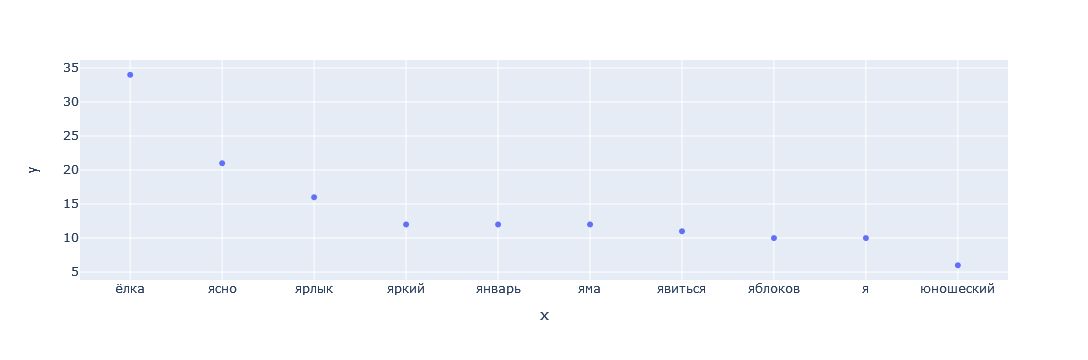

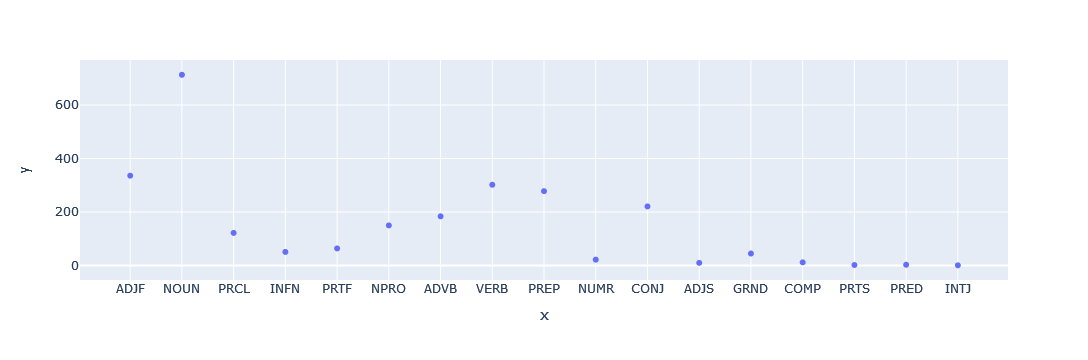

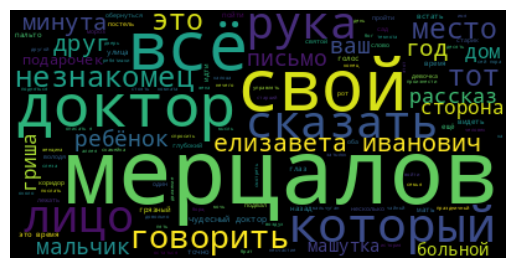

Ночная Смена
Лексическое разнообразие: 32.35627301047862


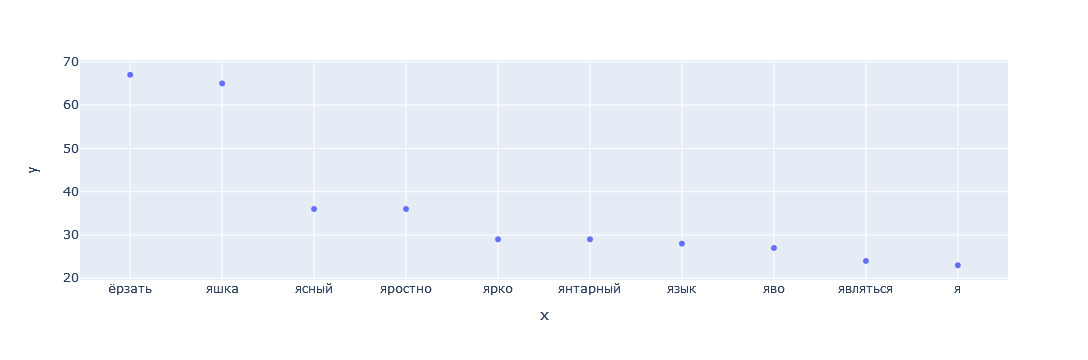

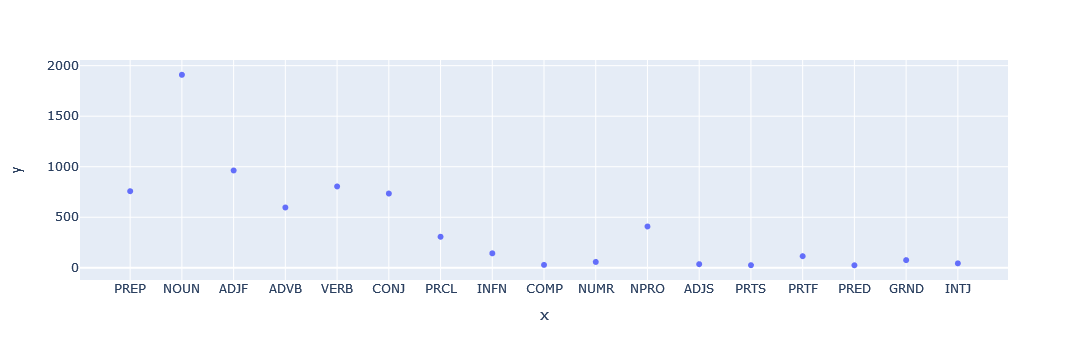

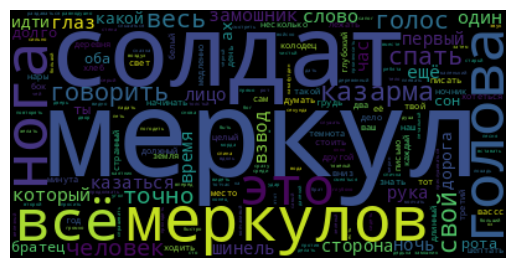

Белый Пудель
Лексическое разнообразие: 29.9592099613568


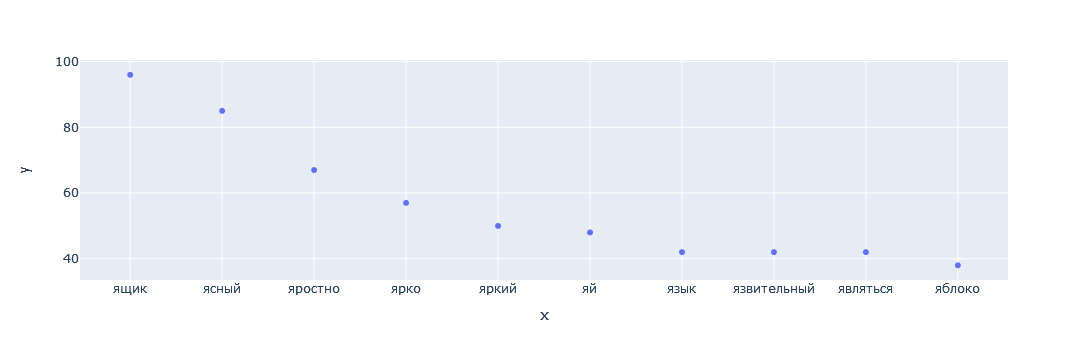

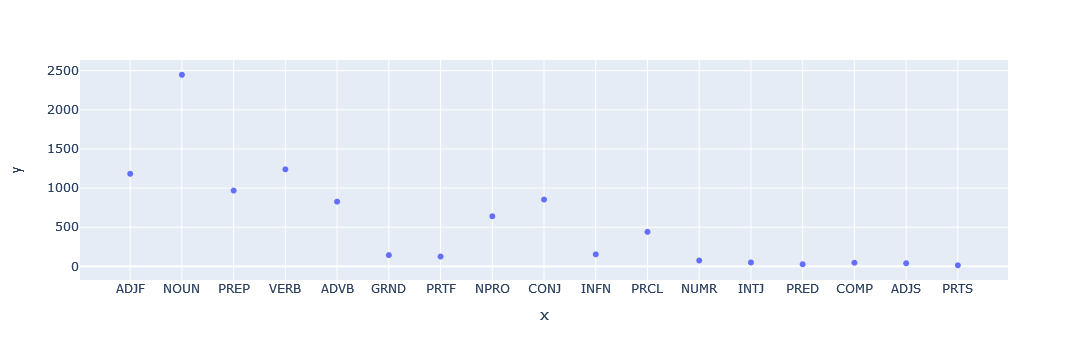

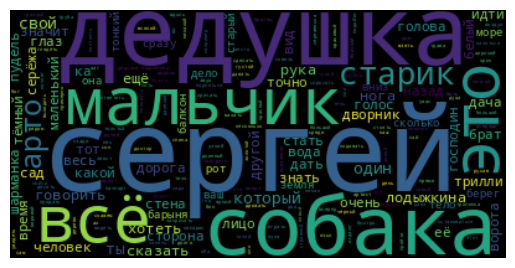

Поединок
Лексическое разнообразие: 13.678400954653938


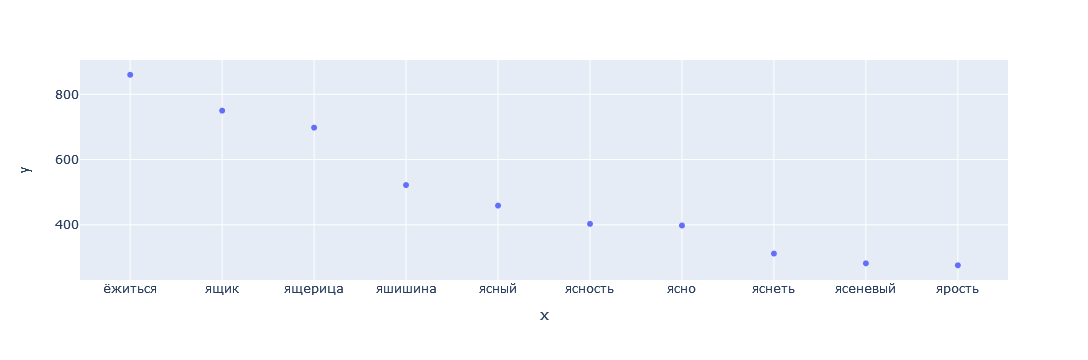

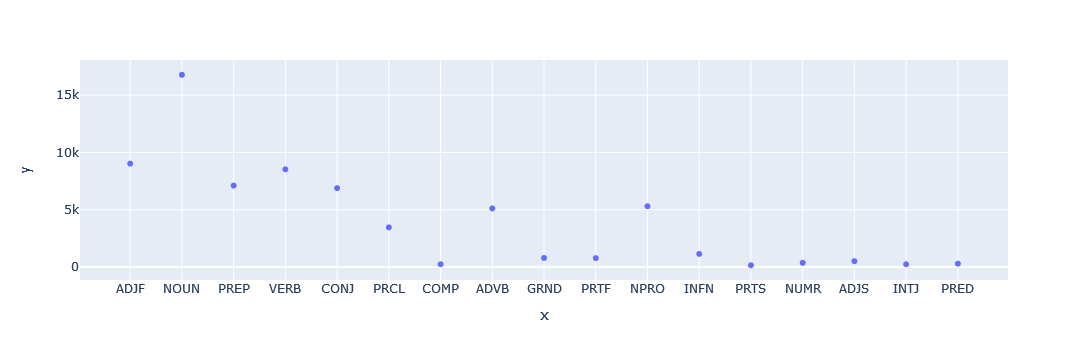

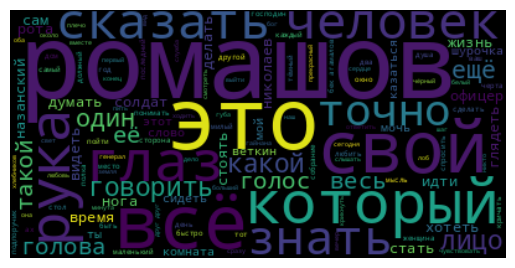

Изумруд
Лексическое разнообразие: 35.35969709718132


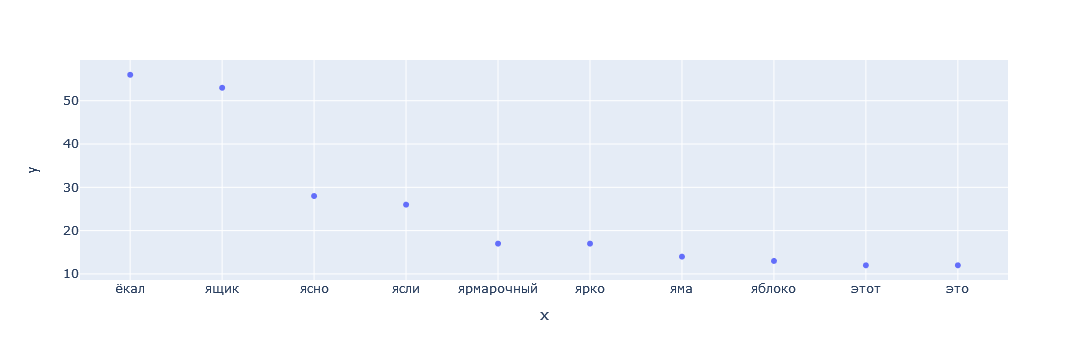

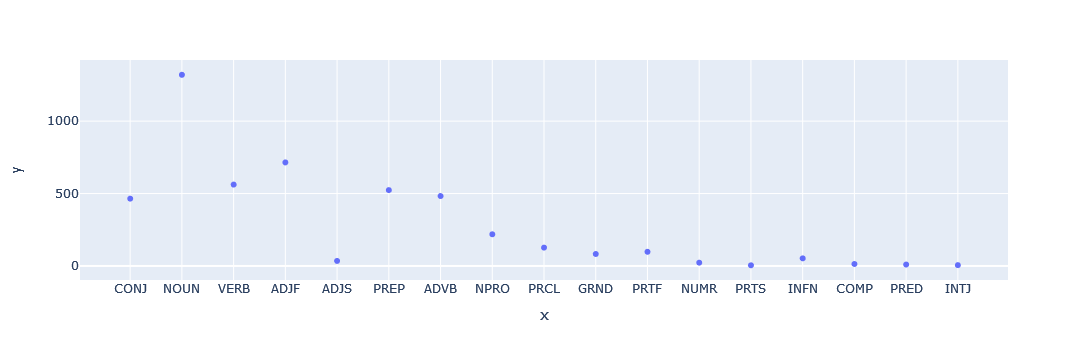

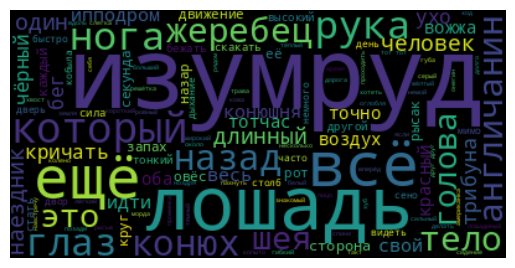

Гранатовый Браслет
Лексическое разнообразие: 25.5370096485668


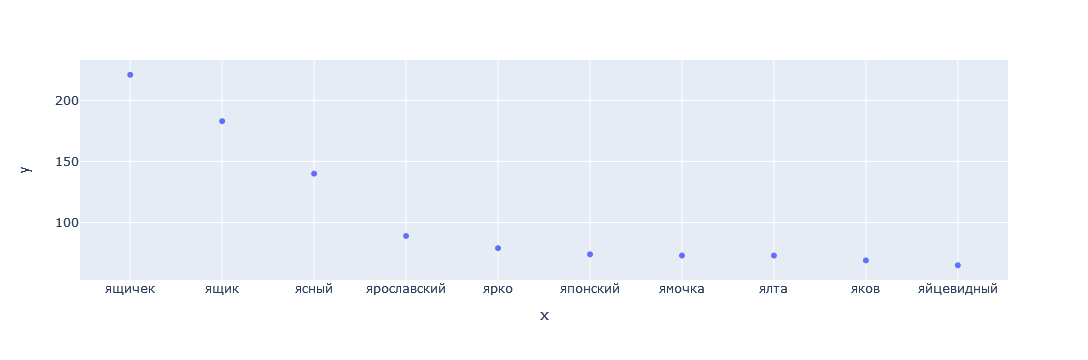

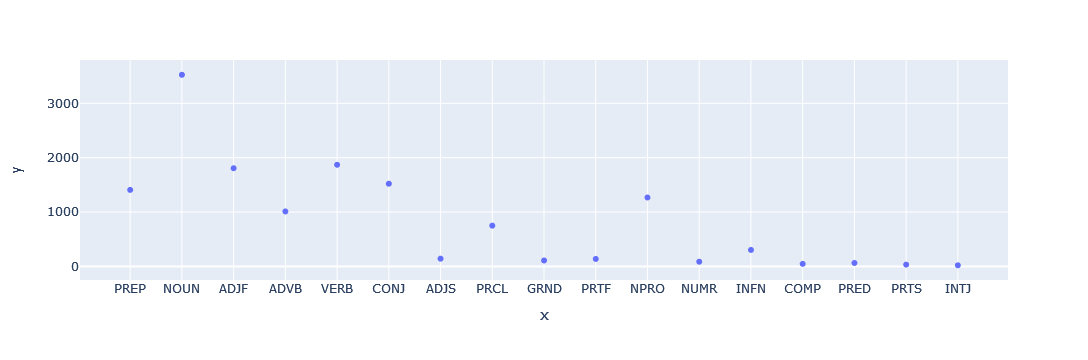

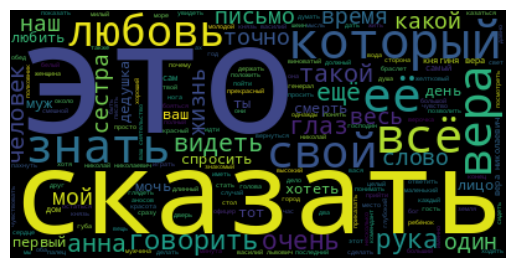

Анафема
Лексическое разнообразие: 47.645788336933045


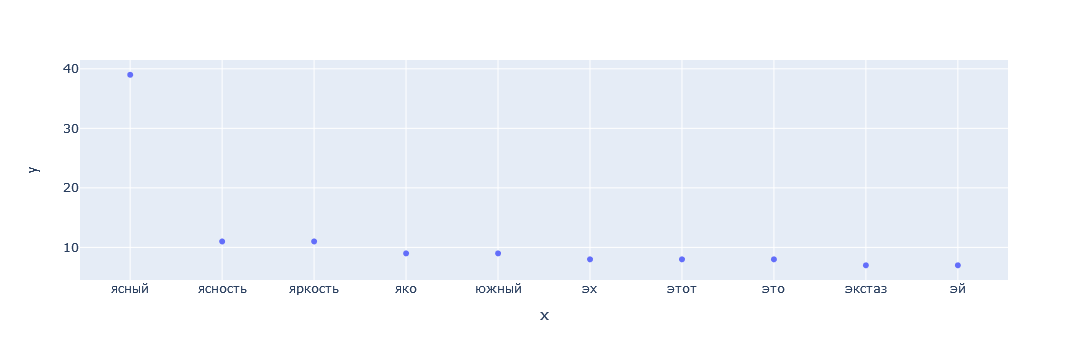

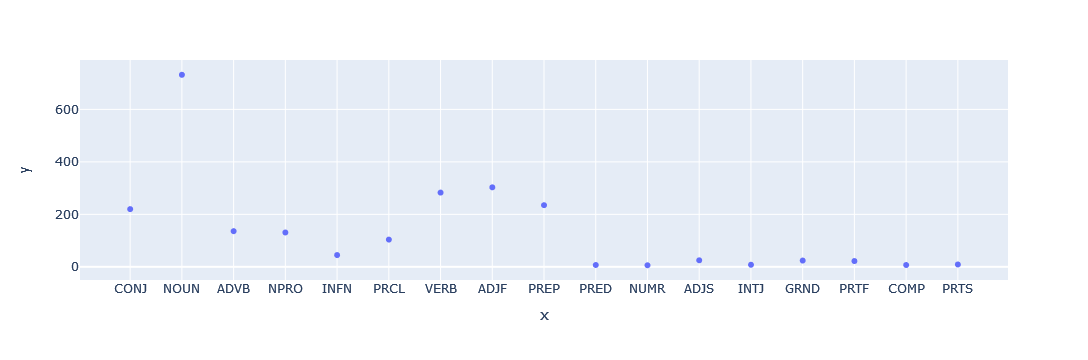

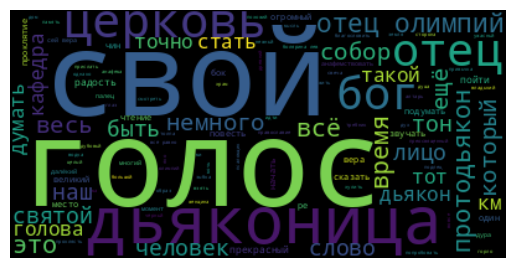

Звезда Соломона
Лексическое разнообразие: 24.987571226433133


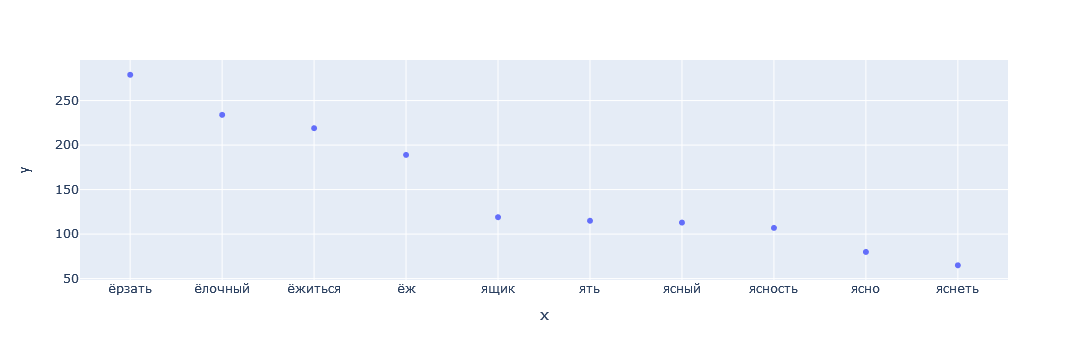

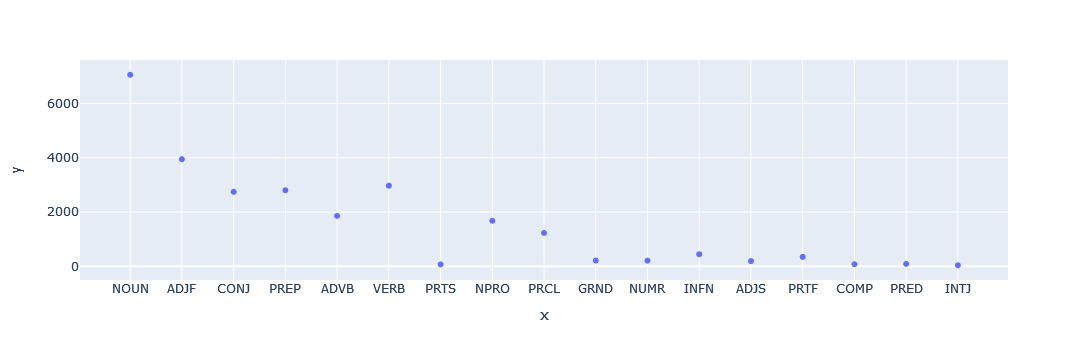

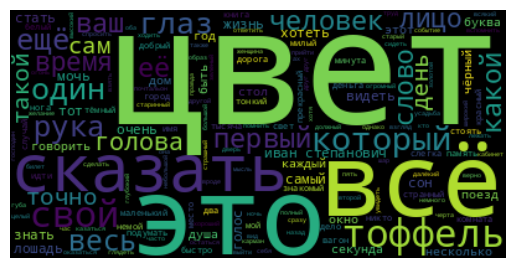

Лимонная Корка
Лексическое разнообразие: 46.821631878557874


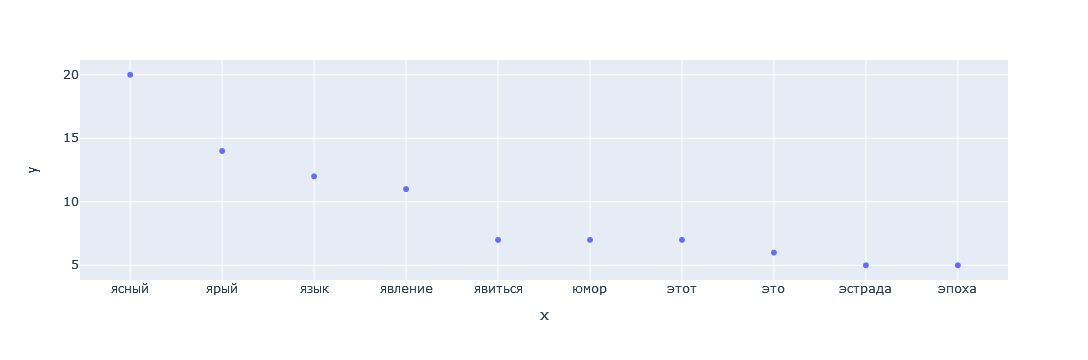

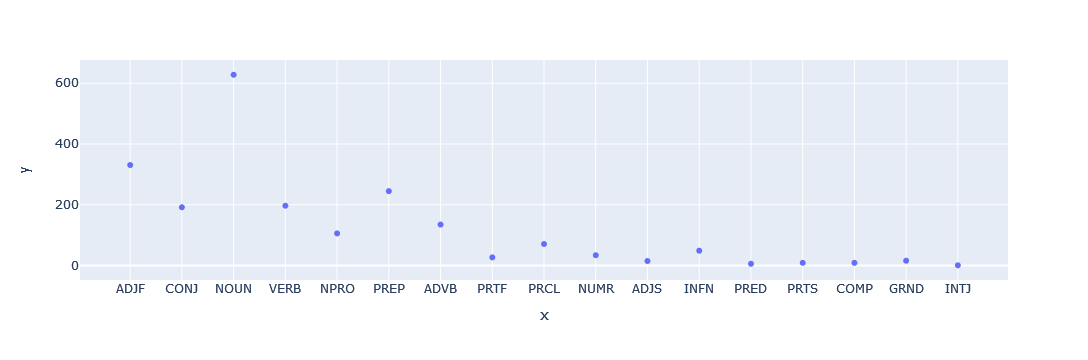

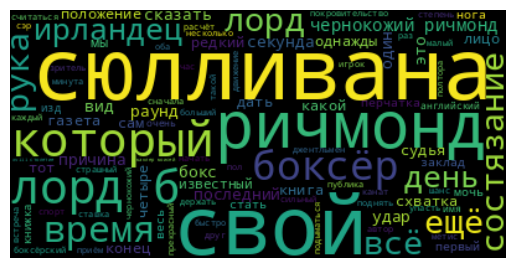

Синяя Звезда
Лексическое разнообразие: 36.55784925588094


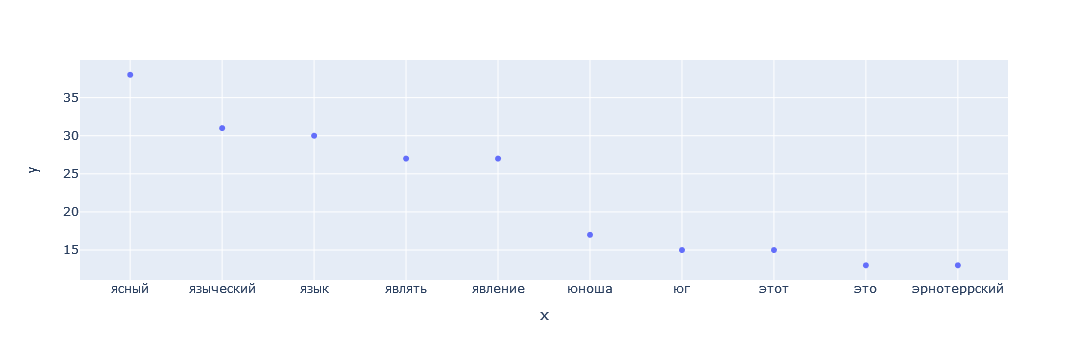

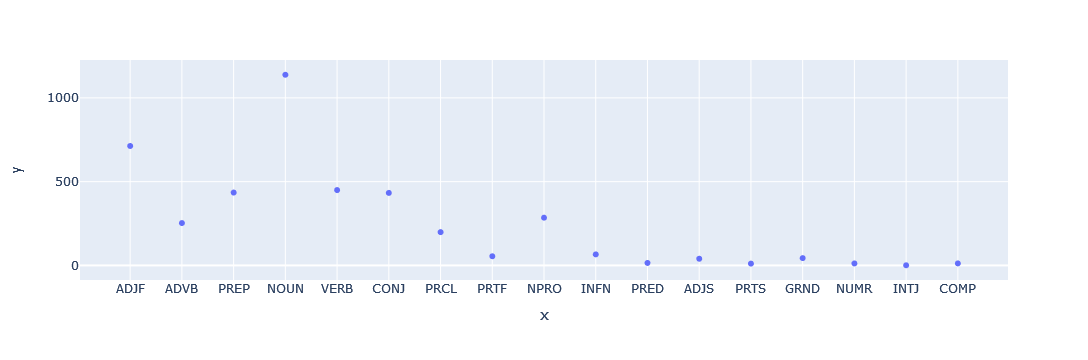

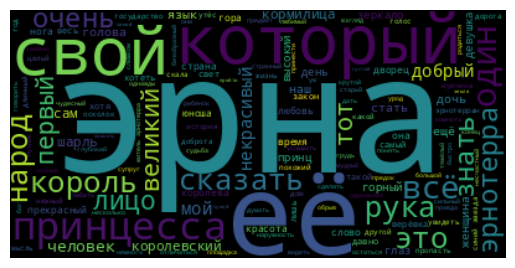

In [28]:
stop = stopwords.words("russian")

for name, tokenized in kuprin.items():
    words = [pair[0] for pair in tokenized] 
    words_w_stop = [morph.parse(pair[0])[0].normal_form for pair in tokenized if pair[0] not in stop]
    POSes = [pair[1] for pair in tokenized]
    print(name)

    print(f"Лексическое разнообразие: {(len(set([morph.parse(word)[0].normal_form for word in words])) / len(words)) * 100}")

    unique_words = []
    for word in words_w_stop:
        if word not in unique_words:
            unique_words.append(word)
    word_count = {}
    for uw in unique_words:
        word_count.update({uw: words.count(uw)})
    fig = px.scatter(x=sorted(word_count.keys(), reverse=True)[:10], y=sorted(word_count.values(), reverse=True)[:10])
    fig.show()

    unique_pos = []
    for pos in POSes:
        if pos not in unique_pos:
            unique_pos.append(pos)
    pos_count = {}
    for up in unique_pos:
        pos_count.update({up: POSes.count(up)})
    fig = px.scatter(x=pos_count.keys(), y=pos_count.values())
    fig.show()

    wordcloud_doc = WordCloud().generate(" ".join(words_w_stop))

    plt.imshow(wordcloud_doc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Выводы:
- С 1900 по 1907 видно падение лексического разнообразия ("Белый Пудель", "Поединок"), которое позже повторялось в 1910 ("Гранатовый Браслет") и 1917 ("Звезда Соломона") годах. Такие падения, впрочем, характерно для литературных жанров рассказа и повести, а также направлений романтизма и реализма, в которых написаны эти произведения. 
- На абсолютном большинстве графиков по частям речи превалируют существительные, прилагательные, глаголы и (не всегда, но часто) наречия, а сама лексика (судя по облакам слов) не пестрит особым разнообразием — всё точно так же упирается в жанры и направления Куприна.
- К концу своей писательской карьеры (начиная с "Лимонной корки") заметен прирост в использовании таких частей речи как причастия, деепричастия и краткие прилагательные. Лексическое разнообразие с тех пор стабилизировалось.

## Предобработка, TF-IDF и косинусное расстояние текстов

In [2]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import spacy
nlp = spacy.load('ru_core_news_sm')
import numpy as np
# from sklearn import 

stop = stopwords.words("russian")

In [24]:
class DIYPreProcessor:

    def pre_process(self, text: str) -> list:
        doc = nlp(text)
        return [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]

    def tf(self, word: str, text: list) -> float:
        return text.count(word)/len(text) 

    def idf(self, word: str, collection: list) -> float:
        try:
            return np.log(len(collection)/len([doc for doc in collection if word in doc]))
        except ZeroDivisionError as e:
            print("Слово не найдено ни в одном документе из корпуса!")
            return  

    def word_to_vector(self, word: str, text: list, collection: list) -> float:        
        try:
            new_collection = []
            for doc in collection:
                new_collection.append(self.pre_process(doc))
            return self.tf(word, self.pre_process(text))*self.idf(word, new_collection)
        except TypeError as e:
            return "Такого слова в корпусе не найдено!"

    def similarity(self, text_a: list, text_b: list, corpus: list) -> float:            # Так, и что теперь с этим делать? 
        text_a, text_b = [set([self.word_to_vector(word, text_a, corpus) for word in text_a])], [set([self.word_to_vector(word, text_b, corpus) for word in text_b])]
        return f"{np.dot(text_a, text_b)/(np.linalg.norm(text_a)*np.linalg.norm(text_b)):.5}"

    def word_pos(self, text: str, start: int, end: int) -> list:
        return [f'{word.lemma_}_{word.pos_}' for word in nlp(text) if not word.is_punct and not word.is_stop][int(start):int(end)]

In [25]:
dpp = DIYPreProcessor()

In [5]:
files = {
    "./Texts/chudesniy_doktor.txt": "Чудесный Доктор",              # 1897
    "./Texts/nochnaya_smena.txt": "Ночная Смена",                   # 1899
    "./Texts/beliy_pudel.txt": "Белый Пудель",                      # 1903
    "./Texts/poedinok.txt": "Поединок",                             # 1905
    "./Texts/izumrud.txt": "Изумруд",                               # 1907
    "./Texts/granatovy_braslet.txt": "Гранатовый Браслет",          # 1910
    "./Texts/anaphema.txt": "Анафема",                              # 1913
    "./Texts/zvezda_solomona.txt": "Звезда Соломона",               # 1917
    "./Texts/limonnaya_korka.txt": "Лимонная Корка",                # 1920
    "./Texts/sinaya_zvezda.txt": "Синяя Звезда",                    # 1927 
    }
kuprin_vec = {}

for path, name in files.items():
    with open(path, "r") as f:
        kuprin_vec.update({name: f.read()})

In [33]:
f'TF-IDF = {dpp.word_to_vector("старик", kuprin_vec["Белый Пудель"], kuprin_vec.values()):.5}'

'TF-IDF = 0.0026295'

In [34]:
f'TF-IDF = {dpp.word_to_vector("пачпорт", kuprin_vec["Белый Пудель"], kuprin_vec.values()):.5}'

'TF-IDF = 0.0024251'

In [35]:
f'TF-IDF = {dpp.word_to_vector("изумруд", kuprin_vec["Изумруд"], kuprin_vec.values()):.5}'

'TF-IDF = 0.056523'

In [36]:
f'TF-IDF = {dpp.word_to_vector("пассат-б4", kuprin_vec["Поединок"], kuprin_vec.values())}'        # Ну, такого слова в корпусе точно нет)

Слово не найдено ни в одном документе из корпуса!


'TF-IDF = Такого слова в корпусе не найдено!'

In [37]:
dpp.similarity(kuprin_vec["Изумруд"], kuprin_vec["Поединок"], kuprin_vec.values())

Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!
Слово не найдено ни в одном документе из корпуса!


KeyboardInterrupt: 

In [1]:
%pip install -Uq sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer.fit_transform(kuprin_vec.values())

Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'sklearn'

## Word Embeddings

In [6]:
pip install -Uq gensim

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gensim.downloader
from gensim.models import KeyedVectors

In [3]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [4]:
word2vec_rus = gensim.downloader.load('word2vec-ruscorpora-300')

In [10]:
{name:len(doc) for name, doc  in kuprin_vec.items()}

{'Чудесный Доктор': 17042,
 'Ночная Смена': 46690,
 'Белый Пудель': 61439,
 'Поединок': 440312,
 'Изумруд': 31451,
 'Гранатовый Браслет': 92452,
 'Анафема': 15454,
 'Звезда Соломона': 175351,
 'Лимонная Корка': 14389,
 'Синяя Звезда': 27555}

In [11]:
min([len(doc) for doc in kuprin_vec.values()])

14389

#### Самый маленький текст — "Лимонная Корка"

In [26]:
for index, word in enumerate(dpp.word_pos(kuprin_vec["Лимонная Корка"], 200, 500)):
    # if index == 20:
    #     break
    print(f'word #{index}/{len(dpp.word_pos(kuprin_vec["Лимонная Корка"], 200, 500))-1} is {word}')

word #0/300 is сказать_VERB
word #1/300 is эпоха_NOUN
word #2/300 is всеобщий_ADJ
word #3/300 is увлечение_NOUN
word #4/300 is бокс_NOUN
word #5/300 is жестокий_ADJ
word #6/300 is вид_NOUN
word #7/300 is спорт_NOUN
word #8/300 is пользоваться_VERB
word #9/300 is больший_ADJ
word #10/300 is почёт_NOUN
word #11/300 is дряблый_ADJ
word #12/300 is время_NOUN
word #13/300 is высокородный_ADJ
word #14/300 is лорд_NOUN
word #15/300 is стесняться_VERB
word #16/300 is публично_ADV
word #17/300 is пристань_NOUN
word #18/300 is засучивать_VERB
word #19/300 is рукав_NOUN
word #20/300 is вступать_VERB
word #21/300 is состязание_NOUN
word #22/300 is здоровенный_ADJ
word #23/300 is лодочник_NOUN
word #24/300 is темзы_PROPN
word #25/300 is держать_VERB
word #26/300 is сюртук_NOUN
word #27/300 is фаворит_NOUN
word #28/300 is профессионал_NOUN
word #29/300 is минута_NOUN
word #30/300 is драться_VERB
word #31/300 is внутри_ADP
word #32/300 is канатный_ADJ
word #33/300 is барьер_NOUN
word #34/300 is 

_SP

In [13]:
word2vec_rus.most_similar(['лорд_NOUN'])

[('сэр_NOUN', 0.6603099703788757),
 ('понсонби_NOUN', 0.6025833487510681),
 ('лорд-канцлер_NOUN', 0.5948062539100647),
 ('английский_ADJ', 0.587902307510376),
 ('фредрик::райленд_NOUN', 0.5841737389564514),
 ('леди_NOUN', 0.5824774503707886),
 ('пемброк_NOUN', 0.5794491171836853),
 ('джон_NOUN', 0.573364794254303),
 ('пэр_NOUN', 0.5690778493881226),
 ('нельсон_NOUN', 0.5676034092903137)]

In [14]:
word2vec_rus.most_similar(positive=['лорд_NOUN', 'английский_ADJ'], negative=['джон_NOUN'])

[('французский_ADJ', 0.5321049690246582),
 ('понсонби_NOUN', 0.5059515833854675),
 ('британский_ADJ', 0.5048244595527649),
 ('лорд::китченеры_NOUN', 0.48763492703437805),
 ('эдуард::грей_NOUN', 0.48723286390304565),
 ('аглицкий_ADJ', 0.47810643911361694),
 ('гаакон_NOUN', 0.47479262948036194),
 ('лорд-канцлер_NOUN', 0.473796010017395),
 ('англичанин_NOUN', 0.4712386131286621),
 ('англия_NOUN', 0.46777382493019104)]

In [17]:
word2vec_rus.most_similar(positive=['портвейн_NOUN', 'спорт_NOUN'], negative=['виски_NOUN'])

[('атлетика_NOUN', 0.5536710619926453),
 ('физкультура_NOUN', 0.5139782428741455),
 ('спортивный_ADJ', 0.4984540045261383),
 ('баскетбол_NOUN', 0.49261176586151123),
 ('футбол_NOUN', 0.4887188673019409),
 ('гиревой::спорт_NOUN', 0.47940877079963684),
 ('волейбол_NOUN', 0.47612446546554565),
 ('парашютизм_NOUN', 0.4733670949935913),
 ('спортсмен_NOUN', 0.4731026887893677),
 ('дюсш_NOUN', 0.47174349427223206)]

##### Ну, звучит логично: перестанешь пить алкоголь и займёшся спортом — станешь спортиком

In [27]:
word2vec_rus.most_similar(positive=['враг_NOUN', 'друг_NOUN'], negative=['зло_NOUN'])

[('дружка_NOUN', 0.5766021013259888),
 ('дружок_NOUN', 0.4583122134208679),
 ('недруг_NOUN', 0.4363701343536377),
 ('соратник_NOUN', 0.4284907579421997),
 ('приятель_NOUN', 0.4241912364959717),
 ('сближаться_VERB', 0.41276219487190247),
 ('взаимно_ADV', 0.40862661600112915),
 ('единомыслие::исповем_NOUN', 0.4045151472091675),
 ('закадычный_ADJ', 0.40286877751350403),
 ('юксинька_NOUN', 0.40146195888519287)]

In [30]:
word2vec_rus.most_similar(positive=['общество_NOUN', 'друг_NOUN'], negative=['злоба_NOUN'])

[('взаимно_ADV', 0.4519149363040924),
 ('взаимодополнение_NOUN', 0.3960105776786804),
 ('гмпр_NOUN', 0.39097583293914795),
 ('сообщество_NOUN', 0.38987889885902405),
 ('тринити::колледж_NOUN', 0.38676080107688904),
 ('ypo_NOUN', 0.3822481632232666),
 ('эконометрический_ADJ', 0.3782498836517334),
 ('леденцовский_ADJ', 0.3778943419456482),
 ('соответсвенно_ADV', 0.376860648393631),
 ('коммуницировать_VERB', 0.3759014308452606)]

In [8]:
word2vec_rus.most_similar(positive=['слово_NOUN', 'злоба_NOUN'], negative=['образ_NOUN'])

[('злость_NOUN', 0.5797069072723389),
 ('ненависть_NOUN', 0.5468634963035583),
 ('ругательство_NOUN', 0.5255523324012756),
 ('гнев_NOUN', 0.5129446387290955),
 ('негодование_NOUN', 0.51006680727005),
 ('ярость_NOUN', 0.5058101415634155),
 ('обида_NOUN', 0.4884057641029358),
 ('презрение_NOUN', 0.4689781069755554),
 ('озлобление_NOUN', 0.4667205810546875),
 ('досада_NOUN', 0.46488630771636963)]